In [3]:
import pandas as pd

boston = pd.read_csv("Boston.csv")

In [5]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [7]:
boston.shape

(506, 13)

number of columns = 13

number of rows = 506

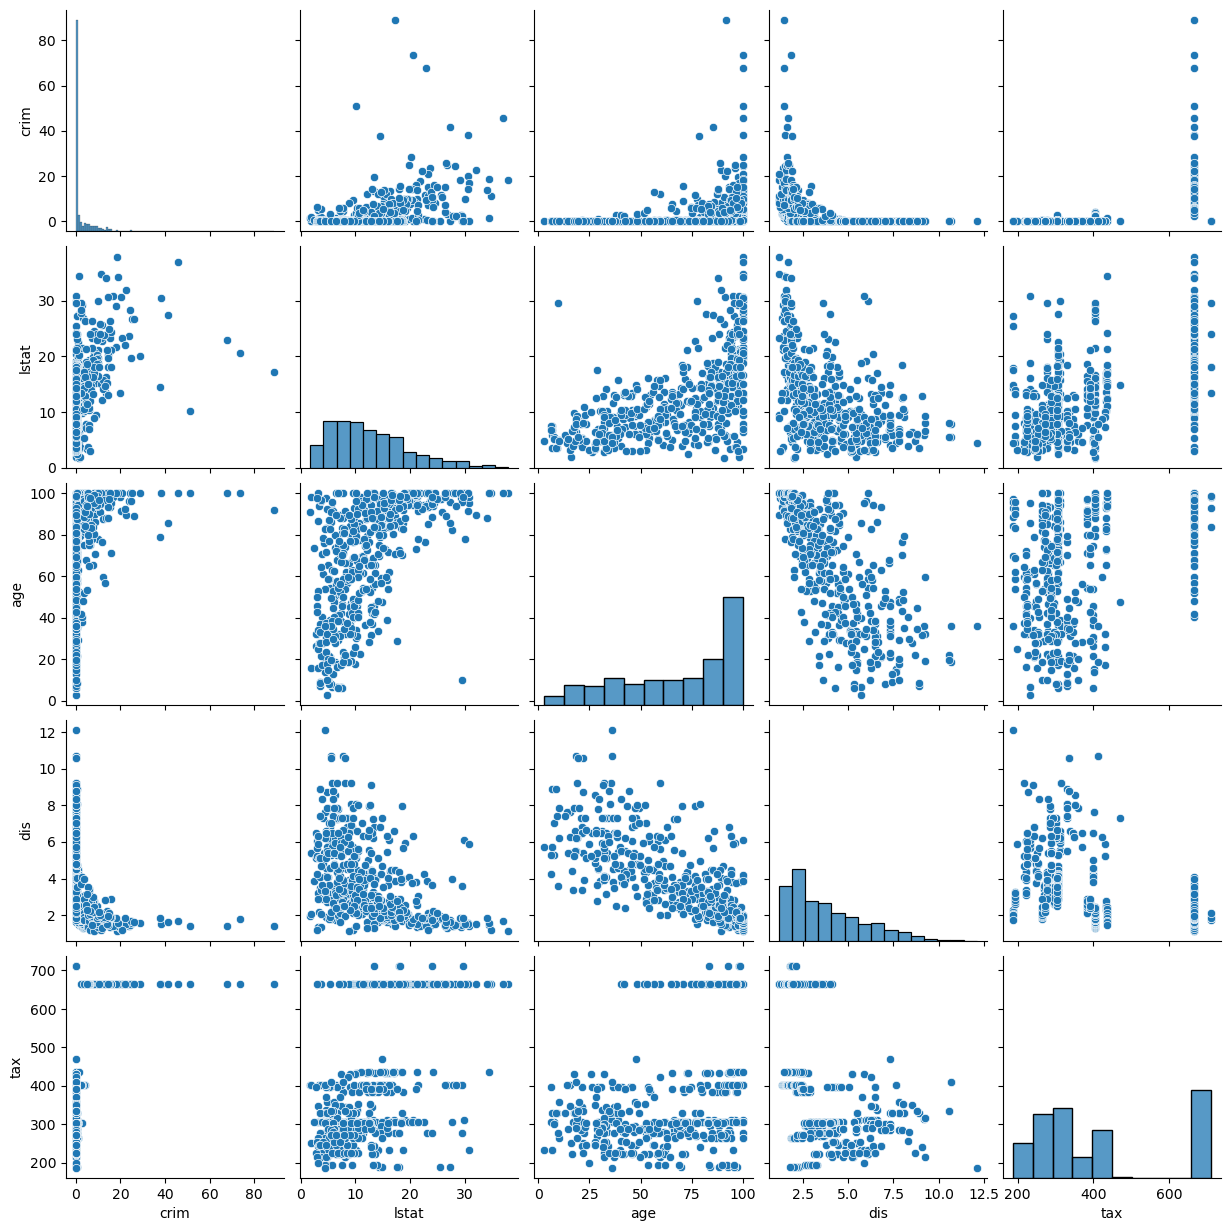

In [10]:
import seaborn as sns
sns.pairplot(boston[['crim', 'lstat', 'age', 'dis', 'tax']])

1. Areas with a higher proportion of low-income people generally have higher crime rates.
2. Areas with a high proportion of old houses tend to have poor public security.
3. The closer you are to the city center, the higher the crime rate; the farther you are from the city center, the lower the crime rate.
4. Areas with high tax rates are often also areas with high crime rates.

array([[<Axes: title={'center': 'crim'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'ptratio'}>, <Axes: >]], dtype=object)

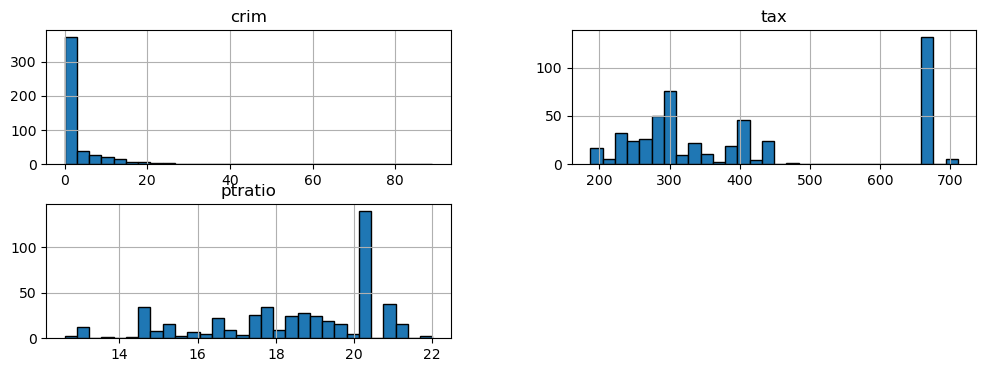

In [12]:
boston[['crim', 'tax', 'ptratio']].hist(bins=30, figsize=(12,4), edgecolor='black')

1. The variable crim has a small number of suburbs have very high crime rates.
2. The variable tax presents a bimodal distribution, with some falling in the low-to-medium tax rate range and some falling in the high tax rate range.
3. The variation of ptratio is not as extreme as crime rate or tax, but there are still some suburbs with particularly high student-teacher ratios, representing large class sizes and insufficient resources.

1. Crime rate: The majority of suburbs have relatively low crime rates close to 0, but a few suburbs show extremely high crime rates. This indicates the presence of significant outliers.
2. Tax rate: Many suburbs fall into the lower to mid ranges, there are some suburbs at the maximum level, suggesting particularly high property tax burdens in certain areas.
3. Pupil-teacher ratio: This predictor is less extreme compared to crime and tax rater. Although the variation is narrower, some suburbs do show relatively high pupil-teacher ratios, implying larger class sizes and fewer resources.

In [15]:
river_counts = boston['chas'].value_counts()
print(river_counts)

chas
0    471
1     35
Name: count, dtype: int64


There are 35 suburbs bound the Charles River.

In [20]:
median_ptratio = boston['ptratio'].median()
print(median_ptratio)

19.05


The median pupil-teacher ratio among the towns is 19.05

In [27]:
min_medv = boston['medv'].min()
lowest_suburb = boston[boston['medv'] == min_medv]
print(lowest_suburb)

        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  


In [37]:
overall_ranges = boston.describe().loc[['min', 'max']]
suburb_values = lowest_suburb.iloc[0]

print("Suburb values:\n", suburb_values)
print("\nOverall ranges:\n", overall_ranges)

Suburb values:
 crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Overall ranges:
          crim     zn  indus  chas    nox     rm    age      dis   rad    tax  \
min   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   1.0  187.0   
max  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265  24.0  711.0   

     ptratio  lstat  medv  
min     12.6   1.73   5.0  
max     22.0  37.97  50.0  


In the Boston suburbs, the lowest median house value is $5,000. These suburbs have these features:

1. High crime rate
2. High percentage of lower-status population
3. Poorer education resources

Compared to the overall ranges, these suburbs fall on the unfavorable side of social and living quality indicators, which explains why their housing prices are so low.

In [42]:
more_than_7 = (boston['rm'] > 7).sum()
more_than_8 = (boston['rm'] > 8).sum()

print("Suburbs with room > 7:", more_than_7)
print("Suburbs with room > 8:", more_than_8)

Suburbs with room > 7: 64
Suburbs with room > 8: 13


64 suburbs average more than 
seven rooms per dwellin

13 suburbs average more than eight rooms per dwellingg

In [71]:
boston_eight_rm = boston[boston["rm"]>8]
boston_rest = boston[boston["rm"]<8]

summary = {
    " ": [">8room", "<=8room"],
    "medv": [boston_eight_rm["medv"].mean(), boston_rest["medv"].mean()],
    "lstat": [boston_eight_rm["lstat"].mean(), boston_rest["lstat"].mean()],
    "ptratio": [boston_eight_rm["ptratio"].mean(), boston_rest["ptratio"].mean()],
    "crim": [boston_eight_rm["crim"].mean(), boston_rest["crim"].mean()],
    "tax": [boston_eight_rm["tax"].mean(), boston_rest["tax"].mean()],
}

sum_df = pd.DataFrame(summary)
sum_df.set_index(" ")

,medv,lstat,ptratio,crim,tax
,,,,,
>8room,44.20000,4.310000,16.361538,0.718795,325.076923
<=8room,21.96146,12.873063,18.510751,3.689855,410.430020


Suburbs with more than eight rooms per dwelling stand out as wealthier and more desirable areas. They show significantly higher in student-teacher ratios, and percentages of lower-status population and lower crime rates, along with lower tax rates compared to the rest of the suburbs. This suggests that larger homes are associated with more affluent neighborhoods offering better living conditions.